# Rozdział 12. Przetwarzanie i analiza danych w `pandas`

**Libraries:**

- [NumPy](https://numpy.org/)
- [SymPy](https://www.sympy.org/en/index.html)
- [Matplotlib](https://matplotlib.org/)
- [SciPy](https://scipy.org/)
- [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.style.use('ggplot')

import seaborn as sns

## Typ Series

In [56]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s.index = ["Sztokholm", "Londyn", "Rzym", "Paryż"] 
s.name = "Populacja"
s

Sztokholm     909976
Londyn       8615246
Rzym         2872086
Paryż        2273305
Name: Populacja, dtype: int64

In [57]:
s = pd.Series(
        [909976, 8615246, 2872086, 2273305], 
        index=["Sztokholm", "Londyn", "Rzym", "Paryż"], 
        name="Populacja")
s

Sztokholm     909976
Londyn       8615246
Rzym         2872086
Paryż        2273305
Name: Populacja, dtype: int64

In [58]:
s["Londyn"]

8615246

In [59]:
s.Sztokholm

909976

In [60]:
s[["Paryż", "Rzym"]]

Paryż    2273305
Rzym     2872086
Name: Populacja, dtype: int64

In [68]:
s.median(), s.mean(), s.std(), s.min(), s.max()

(2572695.5, 3667653.25, 3399048.5005155364, 909976, 8615246)

In [63]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

In [64]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Populacja, dtype: float64

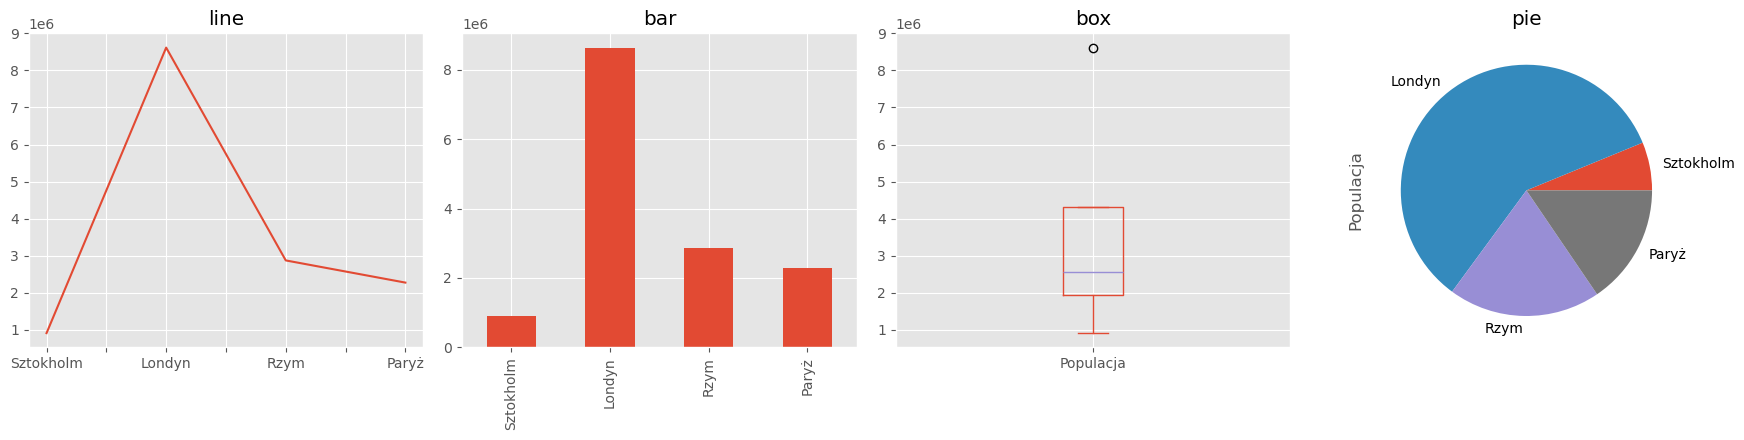

In [65]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4.5))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout(); 

## Typ DataFrame

In [66]:
df = pd.DataFrame([[909976, "Szwecja"],
                   [8615246, "Wlk. Brytania"], 
                   [2872086, "Włochy"],
                   [2273305, "Francja"]])
df.index = ["Sztokholm", "Londyn", "Rzym", "Paryż"]
df.columns = ["Populacja", "Państwo"]
df

,Populacja,Państwo
Sztokholm,909976,Szwecja
Londyn,8615246,Wlk. Brytania
Rzym,2872086,Włochy
Paryż,2273305,Francja


In [67]:
df = pd.DataFrame([[909976, "Szwecja"],
                   [8615246, "Wlk. Brytania"], 
                   [2872086, "Włochy"],
                   [2273305, "Francja"]],
                  index=["Sztokholm", "Londyn", "Rzym", "Paryż"],
                  columns=["Populacja", "Państwo"])
df

,Populacja,Państwo
Sztokholm,909976,Szwecja
Londyn,8615246,Wlk. Brytania
Rzym,2872086,Włochy
Paryż,2273305,Francja


In [69]:
df = pd.DataFrame({
        "Populacja": [909976, 8615246, 2872086, 2273305],
        "Państwo": ["Szwecja", "Wlk. Brytania", "Włochy", "Francja"]},
        index=["Sztokholm", "Londyn", "Rzym", "Paryż"])
df

,Populacja,Państwo
Sztokholm,909976,Szwecja
Londyn,8615246,Wlk. Brytania
Rzym,2872086,Włochy
Paryż,2273305,Francja


In [70]:
df.Populacja # dostajemy obiekt typu Series

Sztokholm     909976
Londyn       8615246
Rzym         2872086
Paryż        2273305
Name: Populacja, dtype: int64

In [71]:
df["Populacja"] # dostajemy obiekt typu Series

Sztokholm     909976
Londyn       8615246
Rzym         2872086
Paryż        2273305
Name: Populacja, dtype: int64

In [72]:
df.loc["Sztokholm"] # dostajemy obiekt typu Series

Populacja     909976
Państwo      Szwecja
Name: Sztokholm, dtype: object

In [73]:
df.loc[["Paryż", "Rzym"]]

,Populacja,Państwo
Paryż,2273305,Francja
Rzym,2872086,Włochy


In [74]:
df.loc[["Paryż", "Rzym"], "Populacja"]

Paryż    2273305
Rzym     2872086
Name: Populacja, dtype: int64

In [75]:
df["Populacja"].mean()

3667653.25

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Sztokholm to Paryż
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Populacja  4 non-null      int64 
 1   Państwo    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


## Duże zestawy danych

In [77]:
!head -n5 ../Dane/r12/miasta_Europy.csv

Pozycja,Miasto,Państwo,Populacja,Data cenzusu
1,Londyn, Wlk. Brytania,"8,615,246",1 czerwca 2014
2,Berlin, Niemcy,"3,437,916",31 maja 2014
3,Madryt, Hiszpania,"3,165,235",1 stycznia 2014
4,Rzym, Włochy,"2,872,086",30 września 2014


In [78]:
df_pop = pd.read_csv("../Dane/r12/miasta_Europy.csv")
df_pop.head()

,Pozycja,Miasto,Państwo,Populacja,Data cenzusu
0,1,Londyn,Wlk. Brytania,"8,615,246",1 czerwca 2014
1,2,Berlin,Niemcy,"3,437,916",31 maja 2014
2,3,Madryt,Hiszpania,"3,165,235",1 stycznia 2014
3,4,Rzym,Włochy,"2,872,086",30 września 2014
4,5,Paryż,Francja,"2,273,305",1 stycznia 2013


In [79]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pozycja       105 non-null    int64 
 1   Miasto        105 non-null    object
 2   Państwo       105 non-null    object
 3   Populacja     105 non-null    object
 4   Data cenzusu  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [80]:
df_pop["Populacja"] = \
    df_pop.Populacja.apply(lambda x: int(x.replace(",", "")))
df_pop.head()

,Pozycja,Miasto,Państwo,Populacja,Data cenzusu
0,1,Londyn,Wlk. Brytania,8615246,1 czerwca 2014
1,2,Berlin,Niemcy,3437916,31 maja 2014
2,3,Madryt,Hiszpania,3165235,1 stycznia 2014
3,4,Rzym,Włochy,2872086,30 września 2014
4,5,Paryż,Francja,2273305,1 stycznia 2013


In [81]:
df_pop["Państwo"] = df_pop["Państwo"].apply(lambda x: x.strip()) # usuwamy biale znaki
df_pop.head()

,Pozycja,Miasto,Państwo,Populacja,Data cenzusu
0,1,Londyn,Wlk. Brytania,8615246,1 czerwca 2014
1,2,Berlin,Niemcy,3437916,31 maja 2014
2,3,Madryt,Hiszpania,3165235,1 stycznia 2014
3,4,Rzym,Włochy,2872086,30 września 2014
4,5,Paryż,Francja,2273305,1 stycznia 2013


In [82]:
df_pop.dtypes

Pozycja          int64
Miasto          object
Państwo         object
Populacja        int64
Data cenzusu    object
dtype: object

In [83]:
df_pop2 = df_pop.set_index("Miasto")
df_pop2 = df_pop2.sort_index()
df_pop2.head()

,Pozycja,Państwo,Populacja,Data cenzusu
Miasto,,,,
Aarhus,92,Dania,326676,1 października 2014
Alicante,86,Hiszpania,334678,1 stycznia 2012
Amsterdam,23,Holandia,813562,31 maja 2014
Antwerpia,59,Belgia,510610,1 stycznia 2014
Ateny,34,Grecja,664046,24 maja 2011


In [84]:
df_pop3 = df_pop.set_index(["Państwo", "Miasto"]).sort_index(level=0)
df_pop3.head(7)

Pozycja  Populacja     Data cenzusu
Państwo   Miasto                                        
Austria   Wiedeń           7    1794770  1 stycznia 2015
Belgia    Antwerpia       59     510610  1 stycznia 2014
          Bruksela        16    1175831  1 stycznia 2014
Bułgaria  Płowdiw         84     341041  31 grudnia 2013
          Sofia           14    1291895  14 grudnia 2014
          Warna           85     335819  31 grudnia 2013
Chorwacja Zagrzeb         24     790017    31 marca 2011

In [85]:
df_pop3.loc["Szwecja"]

,Pozycja,Populacja,Data cenzusu
Miasto,,,
Göteborg,53,528014,31 marca 2013
Malmö,102,309105,31 marca 2013
Sztokholm,20,909976,31 stycznia 2014


In [86]:
df_pop3.loc[("Szwecja", "Göteborg")]

Pozycja                    53
Populacja              528014
Data cenzusu    31 marca 2013
Name: (Szwecja, Göteborg), dtype: object

In [87]:
df_pop.set_index("Miasto").sort_values(["Państwo", "Populacja"], ascending=[False, True]).head(10)

,Pozycja,Państwo,Populacja,Data cenzusu
Miasto,,,,
Ryga,30,Łotwa,701185,1 stycznia 2014
Katania,99,Włochy,315576,31 grudnia 2013
Bari,95,Włochy,322751,31 grudnia 2013
Florencja,75,Włochy,377207,31 grudnia 2013
Bolonia,73,Włochy,384202,31 grudnia 2013
Genua,41,Włochy,594774,31 lipca 2014
Palermo,32,Włochy,677015,31 lipca 2014
Turyn,21,Włochy,898095,30 września 2014
Neapol,19,Włochy,989845,30 września 2014


In [89]:
city_counts = df_pop.Państwo.value_counts()
city_counts.head(10) # obiekt Series

Państwo
Niemcy           19
Wlk. Brytania    16
Hiszpania        13
Polska           10
Włochy           10
Francja           5
Holandia          4
Bułgaria          3
Szwecja           3
Rumunia           3
Name: count, dtype: int64

In [92]:
df_pop4 = df_pop[["Państwo", "Populacja"]].groupby("Państwo")\
    .aggregate("sum").sort_values("Populacja", ascending=False)

df_pop4.head()

,Populacja
Państwo,
Wlk. Brytania,16011877
Niemcy,15119548
Hiszpania,10041639
Włochy,8764067
Polska,6267409


In [93]:
population = df_pop4["Populacja"]
population.head()

Państwo
Wlk. Brytania    16011877
Niemcy           15119548
Hiszpania        10041639
Włochy            8764067
Polska            6267409
Name: Populacja, dtype: int64

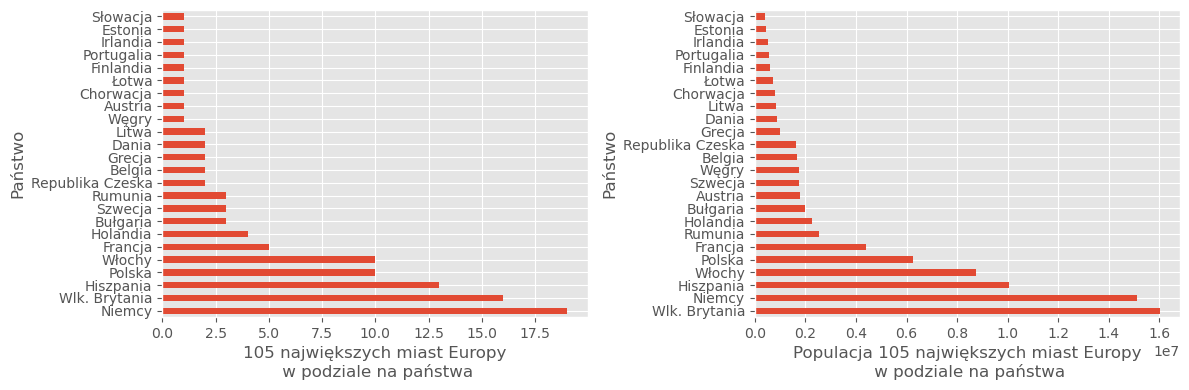

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("105 największych miast Europy\n w podziale na państwa")
population.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Populacja 105 największych miast Europy\n w podziale na państwa")

fig.tight_layout();

## Szeregi czasowe

### Podstawy

In [95]:
import datetime

In [97]:
pd.date_range("2015-1-1", periods=4)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04'], dtype='datetime64[ns]', freq='D')

In [98]:
pd.date_range(datetime.datetime(2015, 1, 1), periods=4)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04'], dtype='datetime64[ns]', freq='D')

In [99]:
pd.date_range("2015-1-1 07:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 07:00:00', '2015-01-01 08:00:00',
               '2015-01-01 09:00:00', '2015-01-01 10:00:00',
               '2015-01-01 11:00:00', '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [107]:
ts1 = pd.Series(np.random.rand(4), index=pd.date_range("2015-1-1", periods=4))
ts1

2015-01-01    0.228896
2015-01-02    0.064266
2015-01-03    0.114844
2015-01-04    0.509932
Freq: D, dtype: float64

In [114]:
ts1.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04'], dtype='datetime64[ns]', freq='D')

In [108]:
ts1["2015-1-3"]

0.11484403842442004

In [109]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00')

In [110]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [112]:
ts2 = pd.Series(np.random.rand(2), 
    index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])
ts2

2015-01-01    0.661175
2015-02-01    0.300266
dtype: float64

In [113]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])
ts3 = pd.Series(np.random.rand(3), index=periods)
ts3

2015-01    0.158712
2015-02    0.471995
2015-03    0.823141
Freq: M, dtype: float64

In [115]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]')

In [116]:
ts2.to_period('M')

2015-01    0.661175
2015-02    0.300266
Freq: M, dtype: float64

In [117]:
pd.date_range("2015-1-1", periods=12, freq="M").to_period()

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='period[M]')

### Przykład z szeregami temperatur

In [134]:
df1 = pd.read_csv('../Dane/r12/temperatury_zewnetrzne_2014.tsv', delimiter="\t", names=["Data", "Temperatura zewnętrzna"]) 

df1.Data = (pd.to_datetime(df1.Data.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

df1 = df1.set_index("Data")
df1.head()

,Temperatura zewnętrzna
Data,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [135]:
df2 = pd.read_csv('../Dane/r12/temperatury_wewnetrzne_2014.tsv', delimiter="\t", names=["Data", "Temperatura wewnętrzna"])

df2.Data = (pd.to_datetime(df2.Data.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

df2 = df2.set_index("Data")
df2.head()

,Temperatura wewnętrzna
Data,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


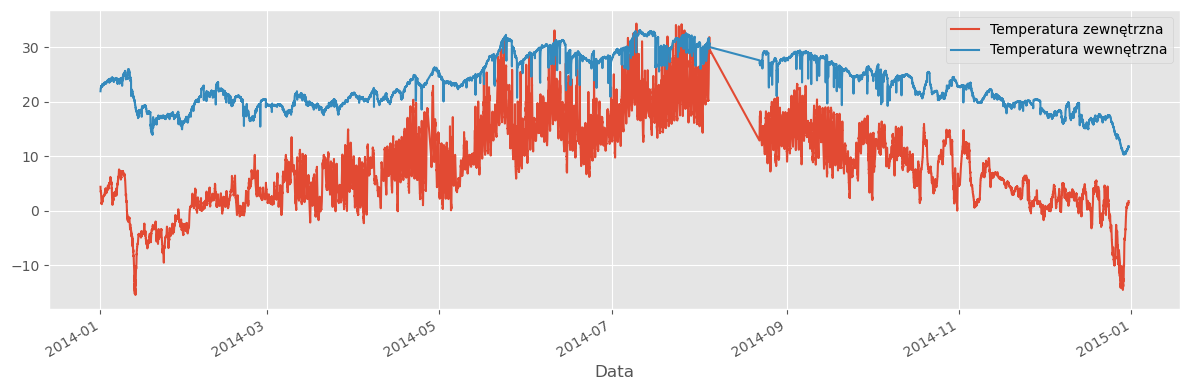

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout();

In [15]:
# dwa sposoby wydzielania danych z szeregu czasowego
df1_jan = df1[(df1.index >= "2014-1-1") & (df1.index < "2014-2-1")]
df2_jan = df2["2014-1-1":"2014-1-31"] 

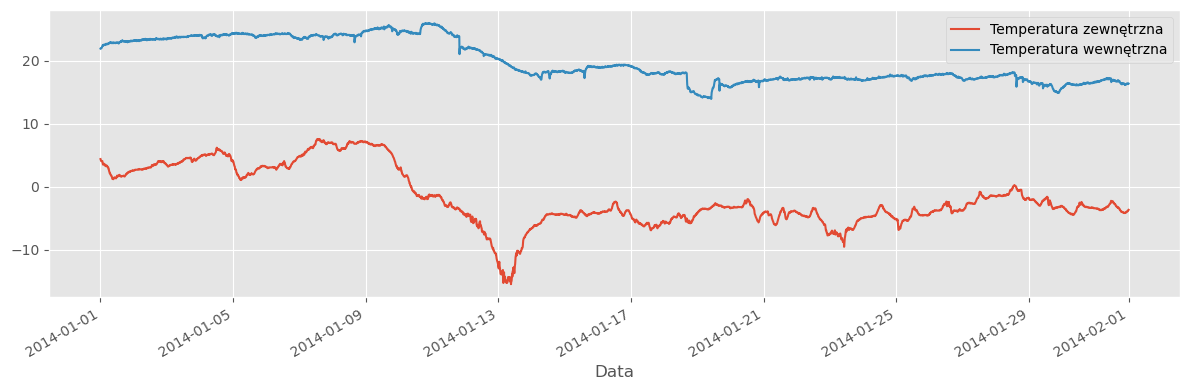

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout(); 

In [25]:
df1_month = df1.reset_index()
df1_month["Miesiąc"] = df1_month.Data.apply(lambda x: x.month)
df1_month = df1_month[["Miesiąc", "Temperatura zewnętrzna"]]
df1_month.head()

,Miesiąc,Temperatura zewnętrzna
0,1,4.38
1,1,4.25
2,1,4.19
3,1,4.06
4,1,4.06


In [28]:
df1_month = df1_month.groupby("Miesiąc").aggregate("mean")
df1_month

,Temperatura zewnętrzna
Miesiąc,
1,-1.776646
2,2.231613
3,4.615437
4,8.105193
5,12.261396
6,15.586955
7,20.780314
8,16.494823
9,12.823905


In [30]:
df2_month = df2.reset_index()
df2_month["Miesiąc"] = df2_month.Data.apply(lambda x: x.month)
df2_month = df2_month[["Miesiąc", "Temperatura wewnętrzna"]]
df2_month.head()

,Miesiąc,Temperatura wewnętrzna
0,1,21.94
1,1,22.00
2,1,22.00
3,1,22.00
4,1,22.00


In [31]:
df2_month = df2_month.groupby("Miesiąc").aggregate("mean")
df2_month

,Temperatura wewnętrzna
Miesiąc,
1,19.862590
2,20.231507
3,19.597748
4,22.149754
5,26.332160
6,28.687491
7,30.605333
8,28.099068
9,26.950366


In [33]:
df_month = df1_month.join(df2_month)
df_month

,Temperatura zewnętrzna,Temperatura wewnętrzna
Miesiąc,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748
4,8.105193,22.149754
5,12.261396,26.332160
6,15.586955,28.687491
7,20.780314,30.605333
8,16.494823,28.099068
9,12.823905,26.950366


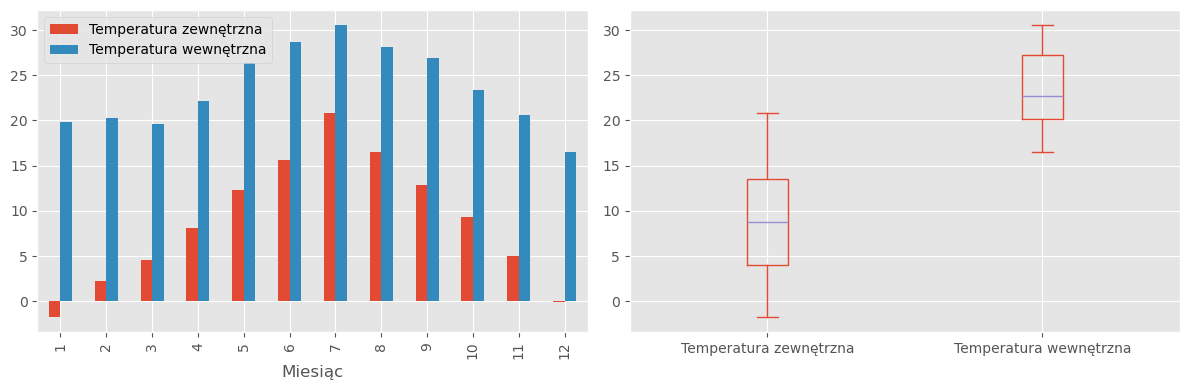

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout(); 

In [136]:
# Prosta metoda dostania srednich miesiecznych za pomoca resample()
df1_month = df1.resample("M").mean()
df1_month

,Temperatura zewnętrzna
Data,
2014-01-31 00:00:00+01:00,-1.776646
2014-02-28 00:00:00+01:00,2.231613
2014-03-31 00:00:00+02:00,4.615437
2014-04-30 00:00:00+02:00,8.105193
2014-05-31 00:00:00+02:00,12.261396
2014-06-30 00:00:00+02:00,15.586955
2014-07-31 00:00:00+02:00,20.780314
2014-08-31 00:00:00+02:00,16.494823
2014-09-30 00:00:00+02:00,12.823905


In [42]:
df1_hour = df1.resample("H").mean()
df1_hour.columns = ["Temperatura zewnętrzna (średnia godzinowa)"]

df1_day = df1.resample("D").mean()
df1_day.columns = ["Temperatura zewnętrzna (średnia dzienna)"]

df1_week = df1.resample("7D").mean()
df1_week.columns = ["Temperatura zewnętrzna (średnia tygodniowa)"]

df1_month = df1.resample("M").mean()
df1_month.columns = ["Temperatura zewnętrzna (średnia miesięczna)"]

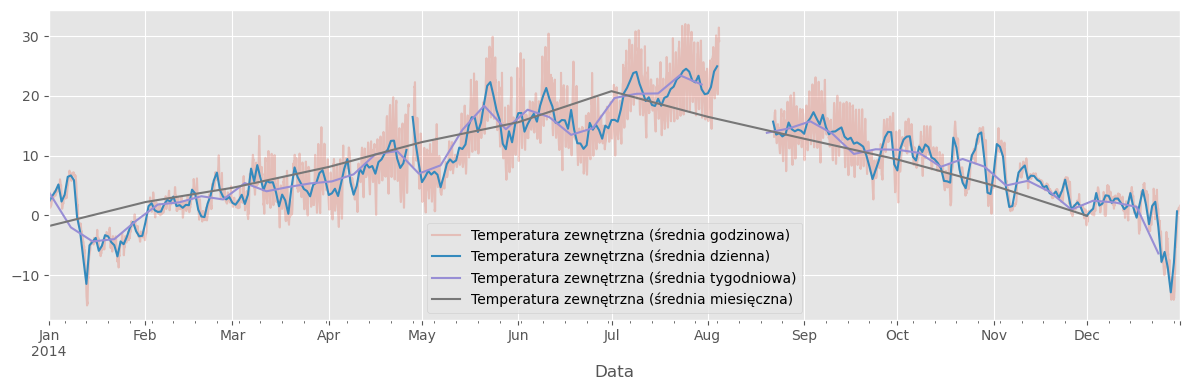

In [46]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

fig.tight_layout(); 

## Wybrany dzień

In [49]:
df1_dec25 = df1.loc["2014-12-25"]
df1_dec25 = df1_dec25.resample("H").mean()
df1_dec25.head(5)

,Temperatura zewnętrzna
Data,
2014-12-25 00:00:00+01:00,-5.041667
2014-12-25 01:00:00+01:00,-5.376667
2014-12-25 02:00:00+01:00,-5.730000
2014-12-25 03:00:00+01:00,-6.103333
2014-12-25 04:00:00+01:00,-6.500000


In [50]:
df2_dec25 = df2.loc["2014-12-25"]
df2_dec25 = df2_dec25.resample("H").mean()
df2_dec25.head(5)

,Temperatura wewnętrzna
Data,
2014-12-25 00:00:00+01:00,16.280000
2014-12-25 01:00:00+01:00,16.230000
2014-12-25 02:00:00+01:00,16.200000
2014-12-25 03:00:00+01:00,16.143333
2014-12-25 04:00:00+01:00,16.120000


In [55]:
df1_dec25.describe()

,Temperatura zewnętrzna
count,24.000000
mean,-7.788819
std,1.475662
min,-10.010000
25%,-9.075833
50%,-7.905833
75%,-6.909167
max,-5.041667


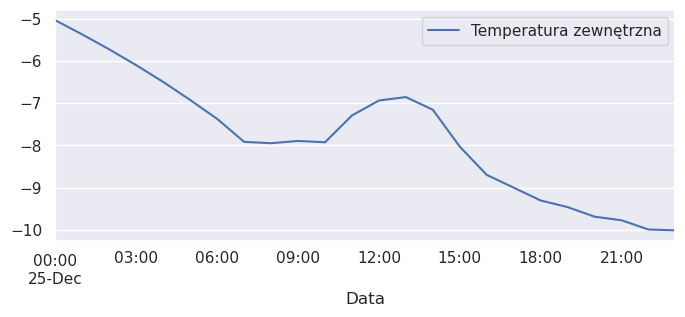

In [138]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
df1_dec25.plot(ax=ax1); 

# Biblioteka Seaborn

In [120]:
sns.set_theme(style="darkgrid")
#sns.set(style="whitegrid")

In [126]:
df1 = pd.read_csv('../Dane/r12/temperatury_zewnetrzne_2014.tsv', delimiter="\t", names=["Data", "Temperatura zewnętrzna"])
df1.Data = pd.to_datetime(df1.Data.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df1 = df1.set_index("Data").resample("15min").mean()
df1.head()

,Temperatura zewnętrzna
Data,
2014-01-01 00:00:00+01:00,4.315
2014-01-01 00:15:00+01:00,4.190
2014-01-01 00:30:00+01:00,4.060
2014-01-01 00:45:00+01:00,4.060
2014-01-01 01:00:00+01:00,4.060


In [129]:
df2 = pd.read_csv('../Dane/r12/temperatury_wewnetrzne_2014.tsv', delimiter="\t", names=["Data", "Temperatura wewnętrzna"])
df2.Data = pd.to_datetime(df2.Data.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("Data").resample("15min").mean()
df2.head()

,Temperatura wewnętrzna
Data,
2014-01-01 00:00:00+01:00,21.970
2014-01-01 00:15:00+01:00,22.000
2014-01-01 00:30:00+01:00,22.000
2014-01-01 00:45:00+01:00,22.060
2014-01-01 01:00:00+01:00,22.185


In [132]:
df_temp = pd.concat([df1, df2], axis=1)
df_temp.head()

,Temperatura zewnętrzna,Temperatura wewnętrzna
Data,,
2014-01-01 00:00:00+01:00,4.315,21.970
2014-01-01 00:15:00+01:00,4.190,22.000
2014-01-01 00:30:00+01:00,4.060,22.000
2014-01-01 00:45:00+01:00,4.060,22.060
2014-01-01 01:00:00+01:00,4.060,22.185


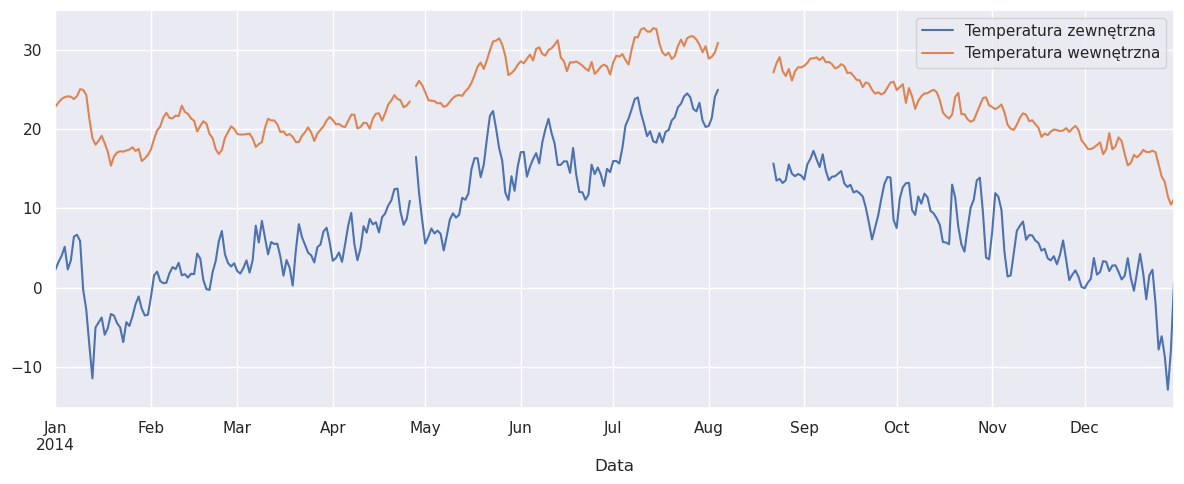

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
df_temp.resample("D").mean().plot(y=["Temperatura zewnętrzna", "Temperatura wewnętrzna"], ax=ax)
fig.tight_layout(); 

In [150]:
df_temp["Miesiąc"] = df_temp.index.month
df_temp["Godzina"] = df_temp.index.hour

df_temp.head(10)

,Temperatura zewnętrzna,Temperatura wewnętrzna,Miesiąc,Godzina
Data,,,,
2014-01-01 00:00:00+01:00,4.315,21.970,1,0
2014-01-01 00:15:00+01:00,4.190,22.000,1,0
2014-01-01 00:30:00+01:00,4.060,22.000,1,0
2014-01-01 00:45:00+01:00,4.060,22.060,1,0
2014-01-01 01:00:00+01:00,4.060,22.185,1,1
2014-01-01 01:15:00+01:00,4.060,22.310,1,1
2014-01-01 01:30:00+01:00,3.715,22.440,1,1
2014-01-01 01:45:00+01:00,3.500,22.500,1,1
2014-01-01 02:00:00+01:00,3.620,22.470,1,2


In [148]:
table = pd.pivot_table(df_temp, values='Temperatura zewnętrzna', index=['Godzina'], columns=['Miesiąc'], aggfunc="mean")

table

Miesiąc,1,2,3,4,5,6,7,8,9,10,11,12
Godzina,,,,,,,,,,,,
0,-1.696129,1.615848,3.189718,5.835134,9.783024,13.213708,17.955524,14.496827,11.130042,8.545605,4.846750,-0.348333
1,-1.781411,1.520045,2.864839,5.330938,9.384556,12.797583,17.348548,13.967885,10.725125,8.492742,4.804750,-0.389792
2,-1.832823,1.479554,2.631500,4.921696,9.010000,12.381542,16.803710,13.550865,10.353958,8.373548,4.795917,-0.434000
3,-1.881815,1.467902,2.523911,4.579646,8.667339,11.968083,16.307460,12.982596,9.975958,8.255282,4.793333,-0.368583
4,-1.925323,1.501964,2.386492,4.389526,8.465605,11.735125,15.998831,12.655673,9.724250,8.166089,4.810167,-0.331375
5,-1.968871,1.486830,2.235565,4.114914,8.457782,11.890542,15.989516,12.524423,9.502167,8.143226,4.786833,-0.328500
6,-2.018468,1.502857,2.241976,4.133319,8.811492,12.499083,16.513145,12.647885,9.361417,8.140161,4.740875,-0.357917
7,-2.036694,1.508795,2.624556,4.734741,9.568790,13.342708,17.484153,13.352212,9.693917,8.145121,4.740750,-0.410458
8,-2.100524,1.668170,3.428911,5.870690,10.756653,14.331000,18.856895,14.566091,10.597250,8.416573,4.793708,-0.486667


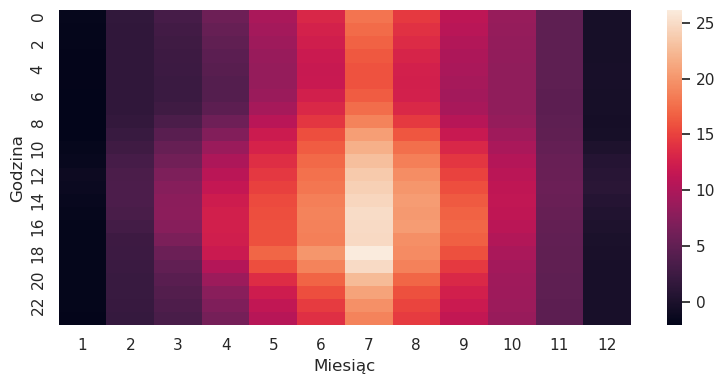

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax);

fig.tight_layout();